# What Has Been Done in This Study?
1. **Data Engineering**: delete useless features, normalize, null
2. **Data analyses (EDA)**: understand the dataset and part of data interpretability.
3. **Models Selection**: compare all the classifier models of scikit-learn.
4. **Intepretal ML to understand model and feature impact**

# Introductoin

## Background
Pancreatic Ductal Adenocarcinoma (PDAC) is the most prevalent form of pancreatic cancer and is recognized as one of the most lethal cancers, with a five-year survival rate of less than 10% post-diagnosis. The insidious nature of PDAC lies in its tendency to remain asymptomatic until the disease has reached an advanced stage, rendering early detection challenging yet critical for improving patient outcomes. This urgent need for effective diagnostic tools is particularly pressing for individuals with a family history of the disease, where early intervention could significantly alter the prognosis. The profound impact of PDAC on families who have lost loved ones underscores the motivation to develop a tool that can detect the disease at its nascent stage.

## The goal

The primary goal of this research is to find the most suitable mode for creating a trustworthy machine-learning-based web application designed to assist in the early diagnosis of pancreatic cancer (PDAC). Furthermore, the research hopes to uncover features value combination impact on prediction outcomes.

## The data
The original datasets from an open-access paper published December 10, 2020. The paper and the full dataset are open-access (CC-BY). Download datasets " Debernardi et al 2020 data.csv" and  "Debernardi et al 2020 documentation.csv" in Kaggle (datasets: https://www.kaggle.com/datasets/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer).


  1. **Patient Cohort** = Patient Group

    * Cohort 1: Previously used samples
    * Cohort 2: Newly added samples

  2. **Sample_Origin** = Country and Hospital

    * BPTB: Barts Pancreas Tissue Bank, London, UK
    * ESP: Spanish National Cancer Research Centre, Madrid, Spain
    * LIV: University of Liverpool, Liverpool, UK
    * UCL: University College London, UK

  3. **age** = Age

    Reported in years

  4. **sex** = Gender

    M: Male
    F: Female

  5. **diagnosis** = Diagnosis

    1: Control (No pancreatic disease)
    2: Benign hepatobiliary disease (119 of which are chronic pancreatitis)
    3: Pancreatic cancer (Patient)

  6. **stage** = Stage (%66 null)

    Stage for those with pancreatic cancer: IA, IB, IIA, IIIB, III, IV

  7. **benign_sample_diagnosis** = Benign Sample Diagnosis (%65 null)

    Diagnosis for non-cancerous benign cases

  8. **plasma_CA19_9**

    Plasma levels of the CA 19-9 monoclonal antibody, often elevated in patients with pancreatic cancer. Evaluated only.

  9. **creatinine** = Creatinine

    Urinary biomarker for kidney function

  10. **YVLE1**
    YVLE1 is lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis

  11. **REG1B**

    REG1B is a protein that may be associated with pancreas regeneration

  12. **TFF1**

    TFF1 is trefoil factor 1, which may be related to regeneration and repair of the urinary tract

  13. **REG1A**

    REG1A is a protein that may be associated with pancreas regeneration and repair of pancreatic tissue.


## Prediction task
The goal in this dataset is predicting diagnosis(pancreatic cancer or not), and more specifically, differentiating between 3 (pancreatic cancer) versus no cancer (including 2 (non-cancerous pancreas condition) and 1 (healthy) ).
The dataset includes information on stage of pancreatic cancer, and diagnosis for non-cancerous patients, but these are not relatonship with prediction.
The goal, after all, is to predict the presence of disease before it's diagnosed, not after!

## Key Findings
Through this research, several key insights have emerged, particularly in the identification of significant predictors for pancreatic cancer (PDAC). Among various models, LightGBM was identified as the most suitable for analysis, demonstrating robust performance across different metrics. In the combination of features, Plasma CA 19-9 proved to be the most significant indicator, while sex was found to have minimal impact. In the feature deep learning via interpretation methods, high levels of Plasma CA 19-9 and LYVE1 were confirmed as critical red flags for PDAC. However, these individual markers alone are not sufficient for definitive diagnosis, underscoring the need for a comprehensive evaluation that considers multiple interacting features. The details of these findings are included in the conclusion. Moreover, it was suggested that "...physicians must be cautious when using CA 19-9 as a diagnostic aid for pancreatic cancer, and that making treatment decisions based solely on a rising CA 19-9 is not recommended. Indeed, the case of Wu and colleagues is another example that CA 19-9 should not be the only indicator for diagnosing pancreatic cancer."

## Notice
Please just view this whole process, don't try to change.

## Import and Setup Operations

In [ ]:
import subprocess
import sys

def install(package):
    """Install a package using pip, suppressing output."""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    except subprocess.CalledProcessError as e:
        print(f"Error installing {package}: {e}")

def is_package_installed(package):
    """Check if a package is already installed."""
    try:
        __import__(package)
        return True
    except ImportError:
        return False

# List of packages to ensure are installed
packages = [
    'lazypredict', 'numpy', 'pandas', 'scikit-learn', 'matplotlib', 'seaborn', 'tensorflow', 'keras', 'scipy','astor',
    'nltk', 'tqdm', 'pillow', 'beautifulsoup4', 'requests', 'flask', 'shap', 'lime', 'graphviz', 'lime'
]

# Install packages if they are not already installed
for package in packages:
    if not is_package_installed(package):
        print(f"Installing {package}...")
        install(package)



Installing lazypredict...
Installing scikit-learn...
Installing astor...
Installing pillow...
Installing beautifulsoup4...
Installing shap...
Installing lime...


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import joblib
from lazypredict.Supervised import LazyClassifier
import shap
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import lime
import lime.lime_tabular
import missingno as msno
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance

from sklearn.inspection import PartialDependenceDisplay
from mpl_toolkits.axes_grid1 import make_axes_locatable

from warnings import filterwarnings
filterwarnings('ignore')

label_encoder = LabelEncoder() # Initialize LabelEncoder

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
)
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV, PassiveAggressiveClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
)
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.dummy import DummyClassifier

In [ ]:
# Upload files (if not already uploaded)
# Make sure download datasets " Debernardi et al 2020 data.csv" and  "Debernardi et al 2020 documentation.csv" in Kaggle
# (datasets link: https://www.kaggle.com/datasets/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer)
# Make sure reload them.

from google.colab import files
uploaded = files.upload()

Saving Debernardi et al 2020 data.csv to Debernardi et al 2020 data.csv
Saving Debernardi et al 2020 documentation.csv to Debernardi et al 2020 documentation.csv


### Importing the Dataset

In [ ]:
Pancreatic_Cancer_D = pd.read_csv("Debernardi et al 2020 documentation.csv")
df_D = Pancreatic_Cancer_D.copy()

Pancreatic_Cancer = pd.read_csv("Debernardi et al 2020 data.csv")
df = Pancreatic_Cancer.copy()

In [ ]:
df_D.head(14) # First 5 observations

,Column name,Original column name,Details
0,sample_id,Sample ID,Unique string identifying each subject
1,patient_cohort,Patient's Cohort,"Cohort 1, previously used samples; Cohort 2, ..."
2,sample_origin,Sample Origin,"BPTB: Barts Pancreas Tissue Bank, London, UK; ..."
3,age,Age,Age in years
4,sex,Sex,"M = male, F = female"
5,diagnosis,"Diagnosis (1=Control, 2=Benign, 3=PDAC)","1 = control (no pancreatic disease), 2 = benig..."
6,stage,Stage,"For those with pancratic cancer, what stage wa..."
7,benign_sample_diagnosis,Benign Samples Diagnosis,"For those with a benign, non-cancerous diagnos..."
8,plasma_CA19_9,Plasma CA19-9 U/ml,Blood plasma levels of CA 19–9 monoclonal anti...
9,creatinine,Creatinine mg/ml,Urinary biomarker of kidney function


In [ ]:
df.shape # what dimensions

(590, 14)

In [ ]:
df.info() # The types of variables in the dataset and whether there are any missing observations are observed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

# Visualization of Missing Data

Handling missing data is an essential part of data analysis and modeling. Visualizing missing data helps us understand which features contain missing data and the prevalence of missing data.

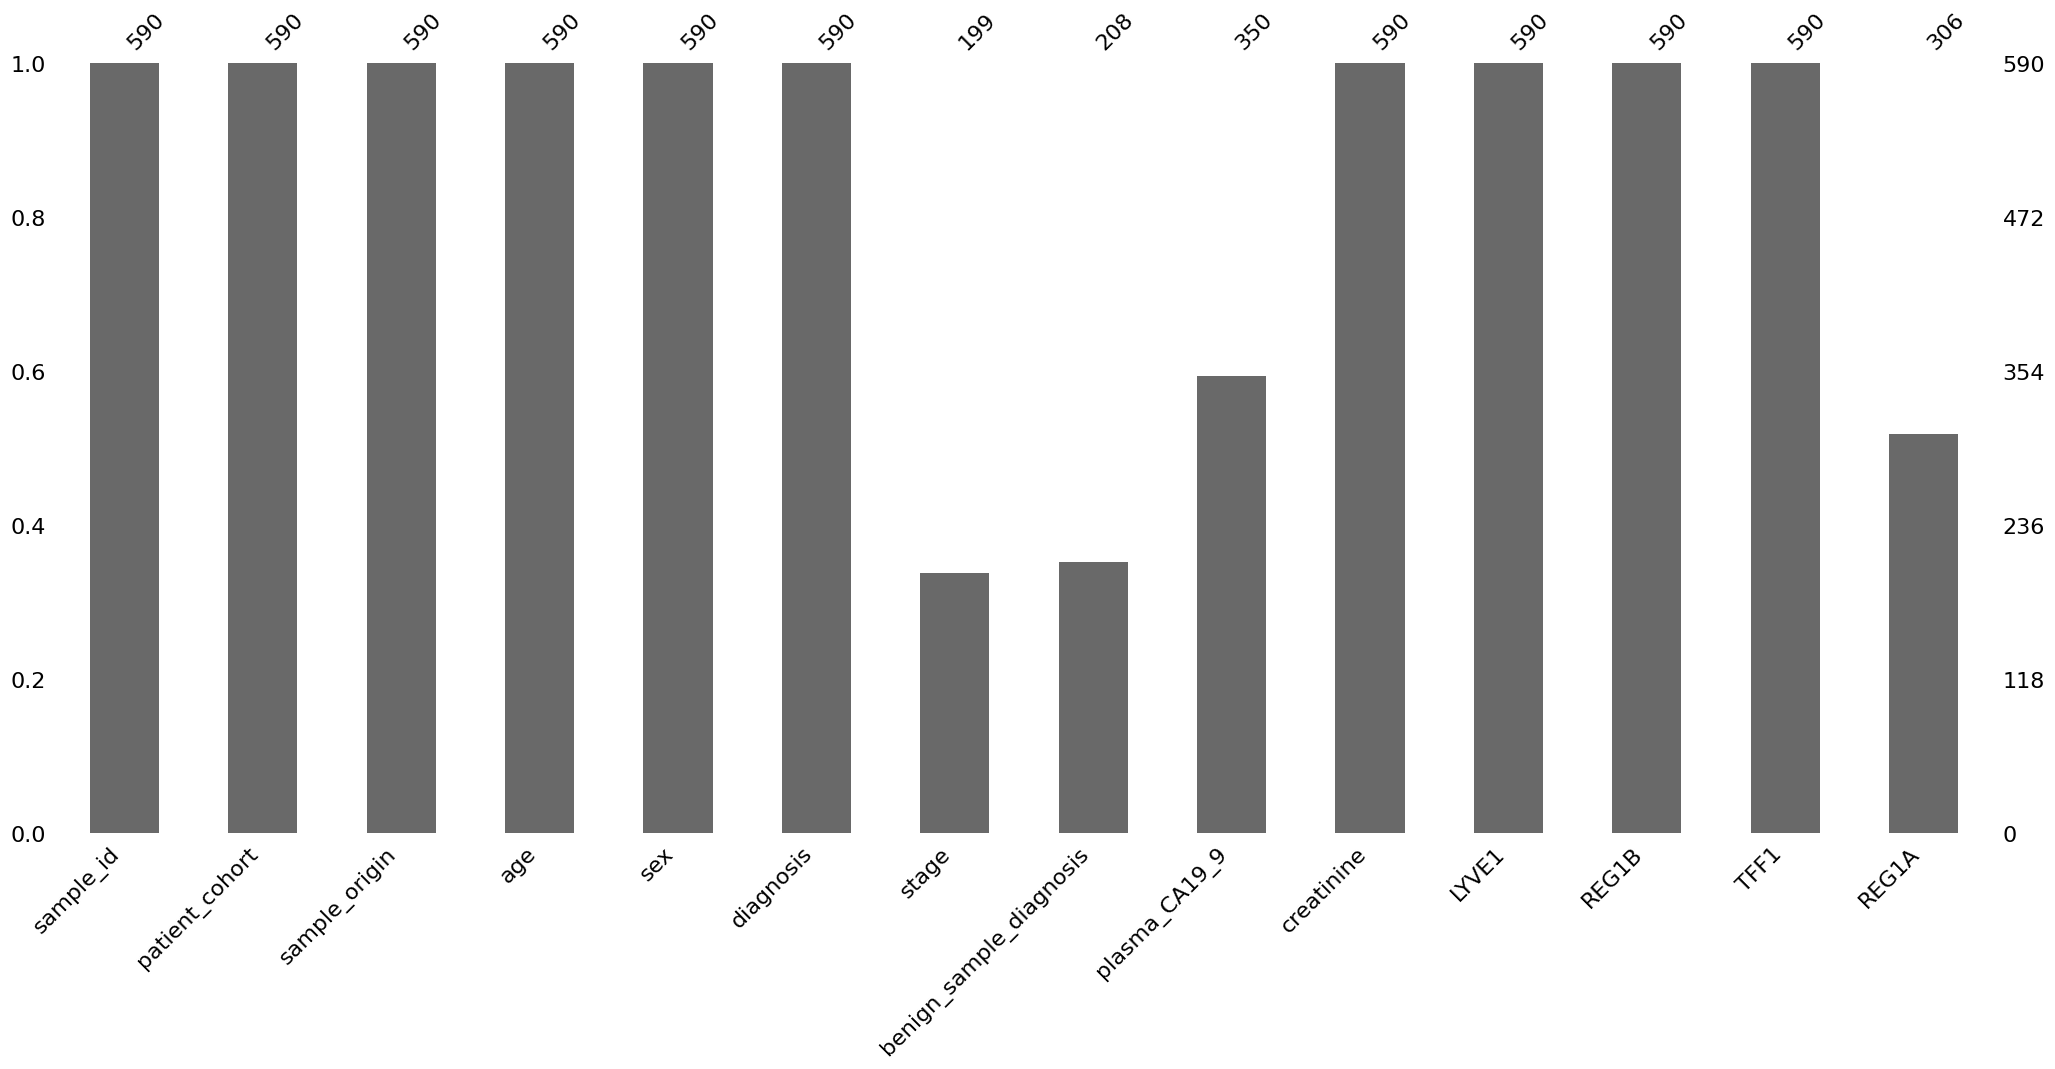

In [ ]:
msno.bar(df); # This graph visually represents the proportion of missing values in variables.

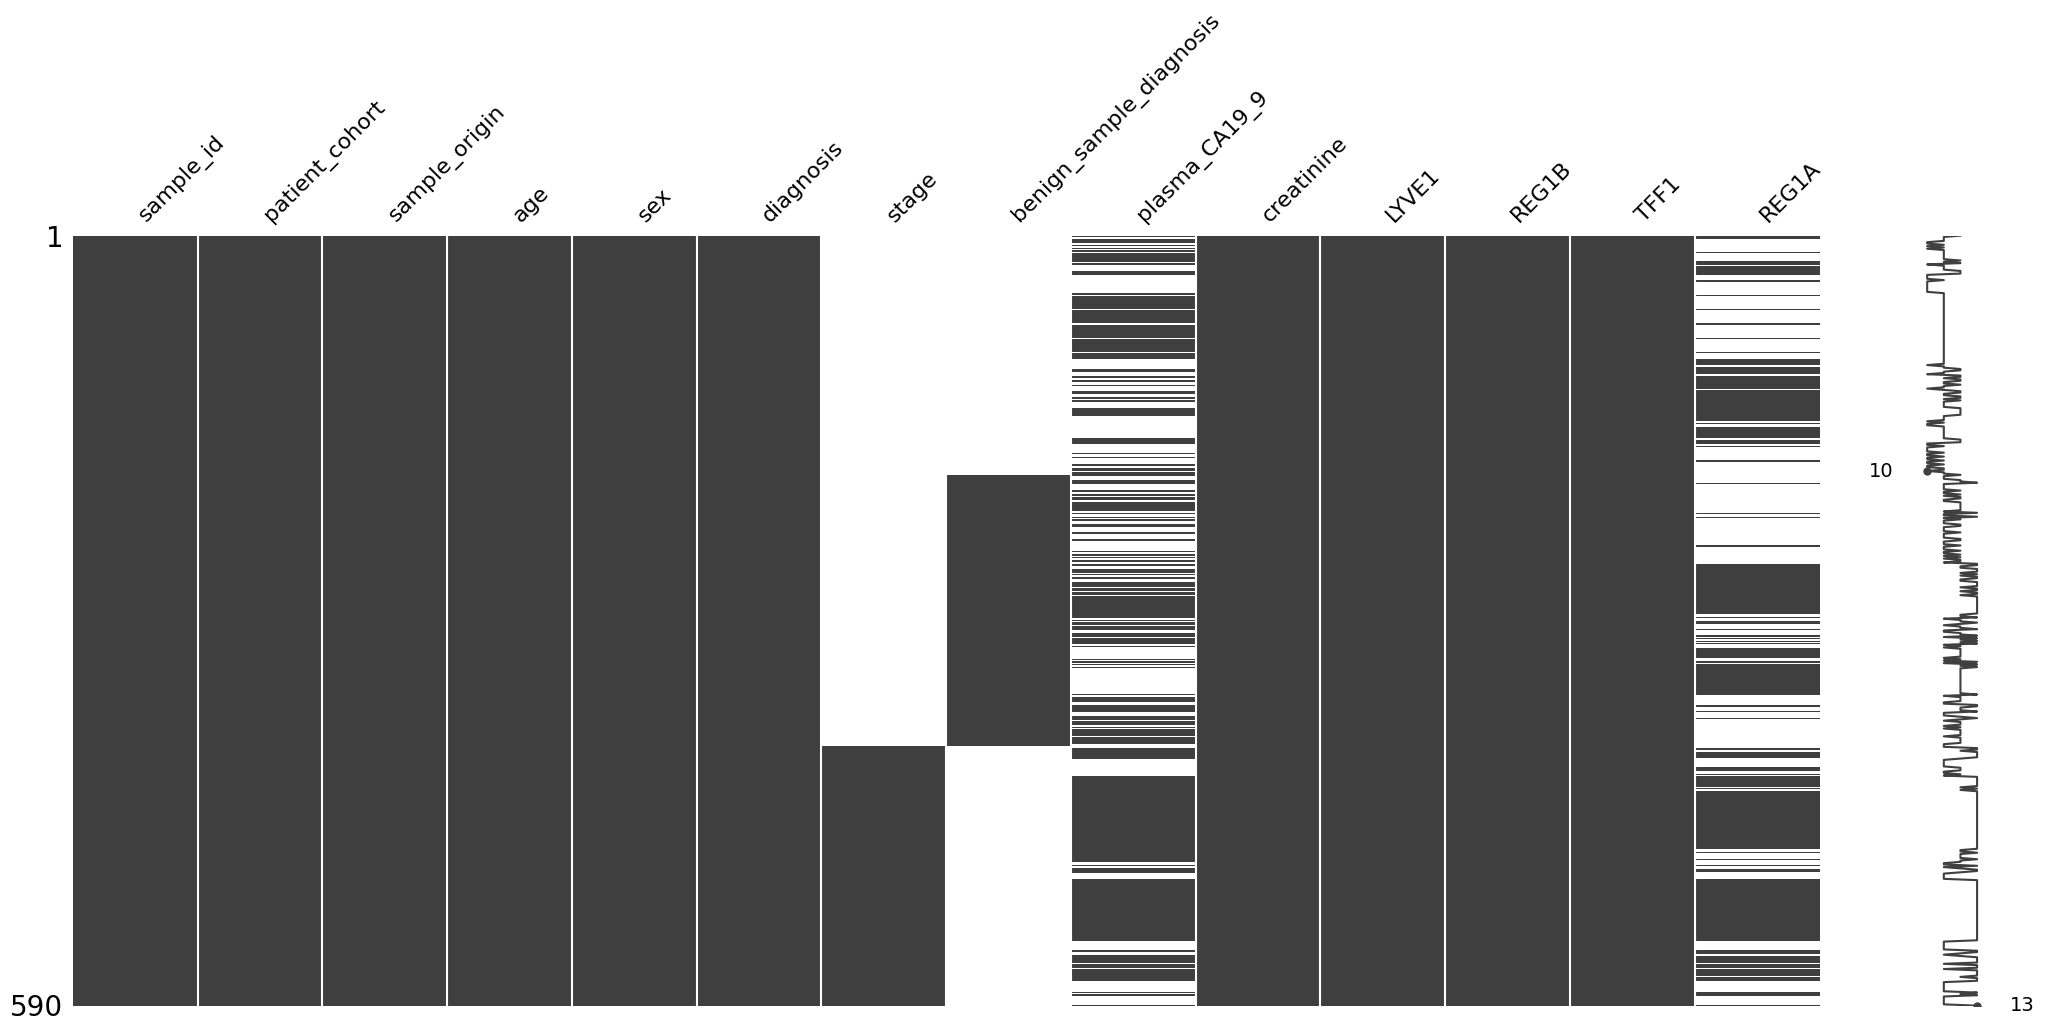

In [ ]:
msno.matrix(df); # This graph allows us to detect structural irregularities related to the randomness of missing values.

# Data Preprocessing

## Delete Useless Features

In [ ]:
# The expressions that are not useful in the dataset have been removed.

# Print columns to verify their existence
df_original = df.columns

# Attempt to delete columns
columns_to_delete = ['stage', 'sample_id', 'benign_sample_diagnosis', 'patient_cohort', 'sample_origin']
for col in columns_to_delete:
    if col in df.columns:
        del df[col]
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Create a DataFrame to show the comparison
comparison = pd.DataFrame({
    'Original Columns': df_original,
    'After Deletion': pd.Index(list(df.columns) + [None] * (len(df_original) - len(df.columns)))
})

print("\nComparison Table:")
print(comparison)


Comparison Table:
           Original Columns After Deletion
0                 sample_id            age
1            patient_cohort            sex
2             sample_origin      diagnosis
3                       age  plasma_CA19_9
4                       sex     creatinine
5                 diagnosis          LYVE1
6                     stage          REG1B
7   benign_sample_diagnosis           TFF1
8             plasma_CA19_9          REG1A
9                creatinine           None
10                    LYVE1           None
11                    REG1B           None
12                     TFF1           None
13                    REG1A           None


## Normalize Features(Object to number)


### Normalize Feature - Sex

In [ ]:
# Fit and transform the 'sex' column
df['sex'] = label_encoder.fit_transform(df['sex'])

# Print the encoding mapping
encoding_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Encoding mapping:", encoding_mapping)

# Print the counts of each class
print("\nCounts of each class:")
print(df['sex'].value_counts())

Encoding mapping: {0: 'F', 1: 'M'}

Counts of each class:
sex
0    299
1    291
Name: count, dtype: int64


In [ ]:
df.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,0,1,11.70,1.83,0.89,52.95,654.28,1262.00
1,81,0,1,NaN,0.97,2.04,94.47,209.49,228.41
2,51,1,1,7.00,0.78,0.15,102.37,461.14,NaN
3,61,1,1,8.00,0.70,0.00,60.58,142.95,NaN
4,62,1,1,9.00,0.21,0.00,65.54,41.09,NaN


## Fill Null Value with mean

In [ ]:
df.isnull().sum() # How many missing observations are there in each variable

,0
age,0
sex,0
diagnosis,0
plasma_CA19_9,240
creatinine,0
LYVE1,0
REG1B,0
TFF1,0
REG1A,284


In [ ]:
df.describe() # Statistical statements

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.00,590.00,590.00,350.00,590.00,590.00,590.00,590.00,306.00
mean,59.08,0.49,2.03,654.00,0.86,3.06,111.77,597.87,735.28
std,13.11,0.50,0.80,2430.32,0.64,3.44,196.27,1010.48,1477.25
min,26.00,0.00,1.00,0.00,0.06,0.00,0.00,0.01,0.00
25%,50.00,0.00,1.00,8.00,0.37,0.17,10.76,43.96,80.69
50%,60.00,0.00,2.00,26.50,0.72,1.65,34.30,259.87,208.54
75%,69.00,1.00,3.00,294.00,1.14,5.21,122.74,742.74,649.00
max,89.00,1.00,3.00,31000.00,4.12,23.89,1403.90,13344.30,13200.00


In [ ]:
# We divided the dataset according to the 'diagnosis' variable - we need to fill in the missing values.

diag1 = pd.DataFrame(df[df.diagnosis==1])
diag2 = pd.DataFrame(df[df.diagnosis==2])
diag3 = pd.DataFrame(df[df.diagnosis==3])

In [ ]:
# We filled in the missing observations with the mean.

diag1['plasma_CA19_9'].fillna(int(diag1['plasma_CA19_9'].mean()), inplace=True)
diag2['plasma_CA19_9'].fillna(int(diag2['plasma_CA19_9'].mean()), inplace=True)
diag3['plasma_CA19_9'].fillna(int(diag3['plasma_CA19_9'].mean()), inplace=True)

In [ ]:
# We filled the missing observations with the mean.

diag1['REG1A'].fillna(int(diag1['REG1A'].mean()), inplace=True)
diag2['REG1A'].fillna(int(diag2['REG1A'].mean()), inplace=True)
diag3['REG1A'].fillna(int(diag3['REG1A'].mean()), inplace=True)

In [ ]:
diag1.isnull().sum()

,0
age,0
sex,0
diagnosis,0
plasma_CA19_9,0
creatinine,0
LYVE1,0
REG1B,0
TFF1,0
REG1A,0


## Merge Datasets

In [ ]:
# Merging the Data Set Separated by Patient Groups

Hasta_Olmayan = pd.concat([diag1, diag2], axis = 0)
Tum_Veri = pd.concat([Hasta_Olmayan, diag3], axis = 0)

In [ ]:
# Processed Data: All_Data

Tum_Veri.isnull().sum()

,0
age,0
sex,0
diagnosis,0
plasma_CA19_9,0
creatinine,0
LYVE1,0
REG1B,0
TFF1,0
REG1A,0


# Exploratory Data Analysis (EDA)

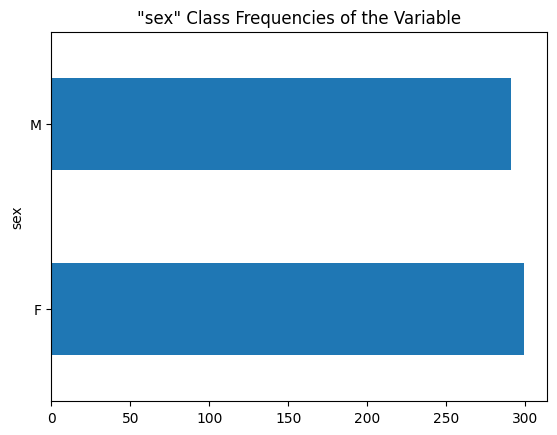

In [ ]:
Pancreatic_Cancer["sex"].value_counts().plot.barh().set_title("\"sex\" Class Frequencies of the Variable");
# The number of women is greater than the number of men.

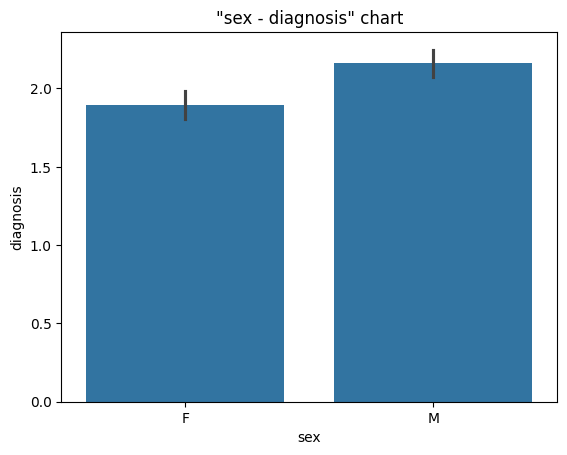

In [ ]:
sns.barplot(x = Pancreatic_Cancer.sex, y = "diagnosis", data = Pancreatic_Cancer).set_title("\"sex - diagnosis\" chart");
# It is observed that there are more male patients compared to females.

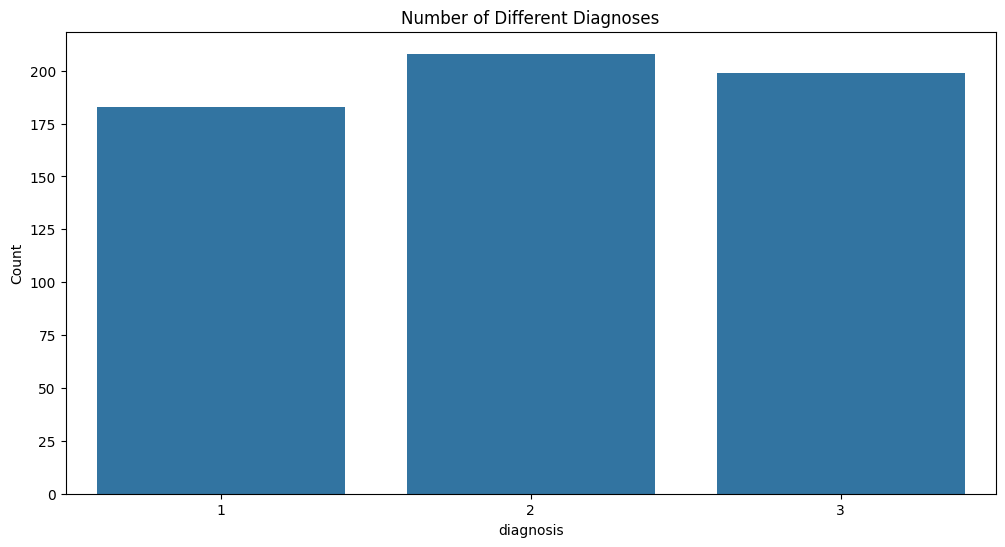

In [ ]:
# Assuming 'Pancreatic_Cancer' is your DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x="diagnosis", data=Pancreatic_Cancer)
plt.title('Number of Different Diagnoses')
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.show()

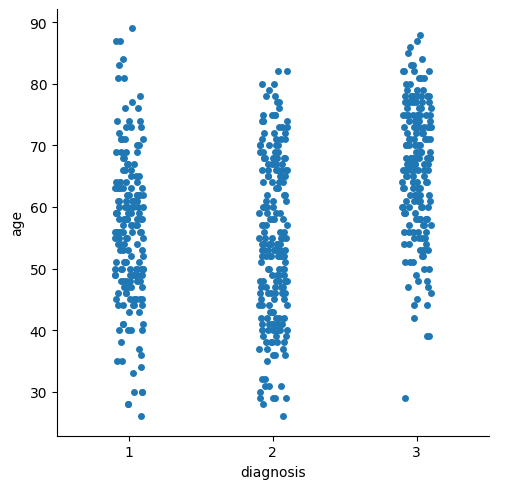

In [ ]:
sns.catplot(x = "diagnosis", y = "age", data = Tum_Veri);
# Proportionally, it is observed that those with cancer are older in age.

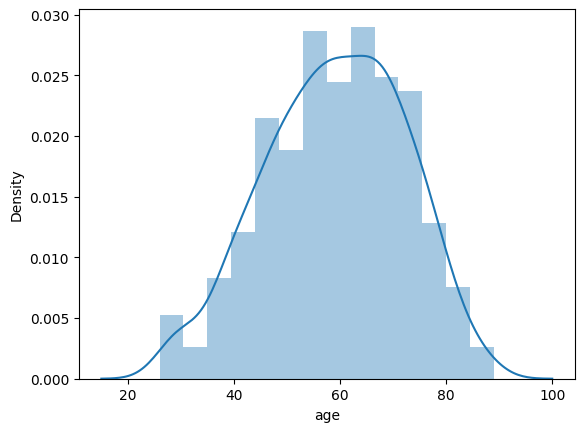

In [ ]:
sns.distplot(Tum_Veri.age, kde = True);
# When looking at the age variable, it is observed to be concentrated around 60.

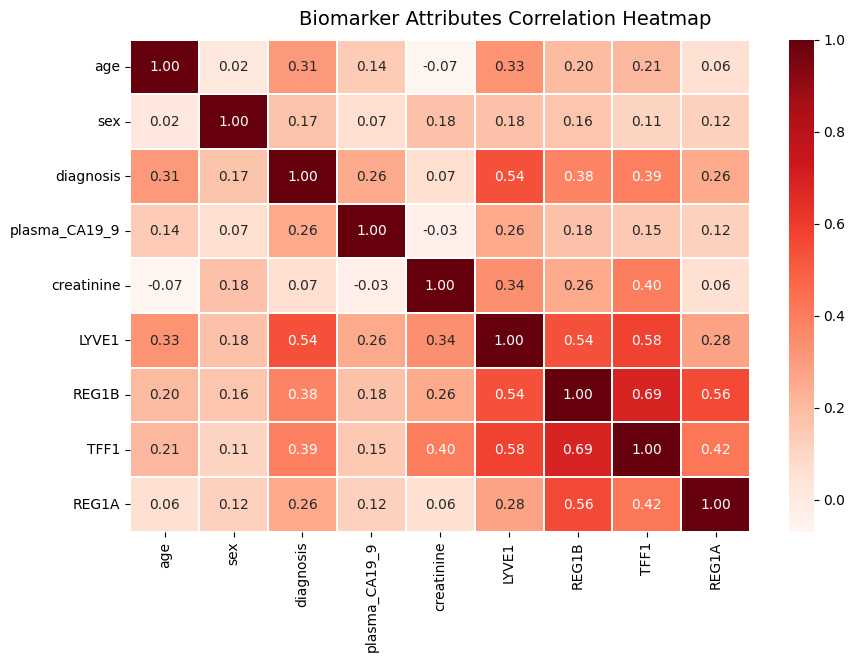

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Biomarker Attributes Correlation Heatmap', fontsize=14)

# Model Selection

## Performance Comparing by Lazypredict

In [ ]:
Hasta_Olmayan.diagnosis = 0
diag3.diagnosis = 1
df2 = pd.concat([Hasta_Olmayan, diag3], axis = 0)

In [ ]:
df = df2.copy()

X = df.drop(["diagnosis"], axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63)

In [ ]:
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
print("Tum Veri", Tum_Veri.shape)

X_train (472, 8)
y_train (472,)
X_test (118, 8)
y_test (118,)
Tum Veri (590, 9)


In [ ]:
#define lazylcassifier and its arguments
clf=LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)

In [ ]:
#fitting given parameters
models,predictions=clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 19.74it/s]

[LightGBM] [Info] Number of positive: 163, number of negative: 309
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 818
[LightGBM] [Info] Number of data points in the train set: 472, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345339 -> initscore=-0.639591
[LightGBM] [Info] Start training from score -0.639591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.97,0.97,0.98,0.17
XGBClassifier,0.97,0.95,0.95,0.97,0.12
RandomForestClassifier,0.96,0.95,0.95,0.96,0.23
BaggingClassifier,0.95,0.92,0.92,0.95,0.06
AdaBoostClassifier,0.95,0.92,0.92,0.95,0.16
ExtraTreesClassifier,0.92,0.92,0.92,0.92,0.15
LinearSVC,0.92,0.91,0.91,0.92,0.04
DecisionTreeClassifier,0.92,0.91,0.91,0.92,0.02
Perceptron,0.91,0.90,0.90,0.91,0.02


## Select Comparing Models and Train Models

In [ ]:
# Define the models
selected_models = {
    "Light Gradient Boost": LGBMClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Linear SVC": LinearSVC(random_state=42)
}


# Function to train and test models
def train_and_test_models(X_train, X_test, y_train, y_test):
    # Dictionary to store results
    results = {}

    # Train and test each model
    for name, model in selected_models.items():
        print(f"Training {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Store the results
        results[name] = {
            "predict_results": y_pred,
            "confusion_matrix": conf_matrix
        }

    return results

# Call the function to train and test models
results = train_and_test_models(X_train, X_test, y_train, y_test)

# Create the model_list
model_list = []

for name, model in selected_models.items():
    tmp = {
        "model": model,
        "name": name,
        "predict_value": results[name]['predict_results'],
        "confusion_matrix": results[name]['confusion_matrix']
    }
    model_list.append(tmp)

# Now, model_list contains the results of all the models


Training Light Gradient Boost...
[LightGBM] [Info] Number of positive: 163, number of negative: 309
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 472, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345339 -> initscore=-0.639591
[LightGBM] [Info] Start training from score -0.639591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [ ]:
for item in model_list:
  print(item)


{'model': LGBMClassifier(random_state=42), 'name': 'Light Gradient Boost', 'predict_value': array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0]), 'confusion_matrix': array([[81,  1],
       [ 3, 33]])}
{'model': RandomForestClassifier(random_state=42), 'name': 'Random Forest', 'predict_value': array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

## Compare Models via Results Interpretation

## Compare Models - Results Interpretation - Confusion Matrix

In [ ]:
# grid display function
def display_grid(func,w,l):
  # Define the number of columns for your grid
  cols = 2
  num_models = len(model_list)
  rows = (num_models + cols - 1) // cols  # Calculate the number of rows needed

  # Create subplots
  fig, axes = plt.subplots(rows, cols, figsize=(w, l * rows))

  # Flatten axes array for easy indexing
  axes = axes.flatten()

  # Plot each chart in the appropriate subplot
  func(axes)

  # Hide any empty subplots
  for j in range(num_models, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout(pad = 4.0)
  plt.show()

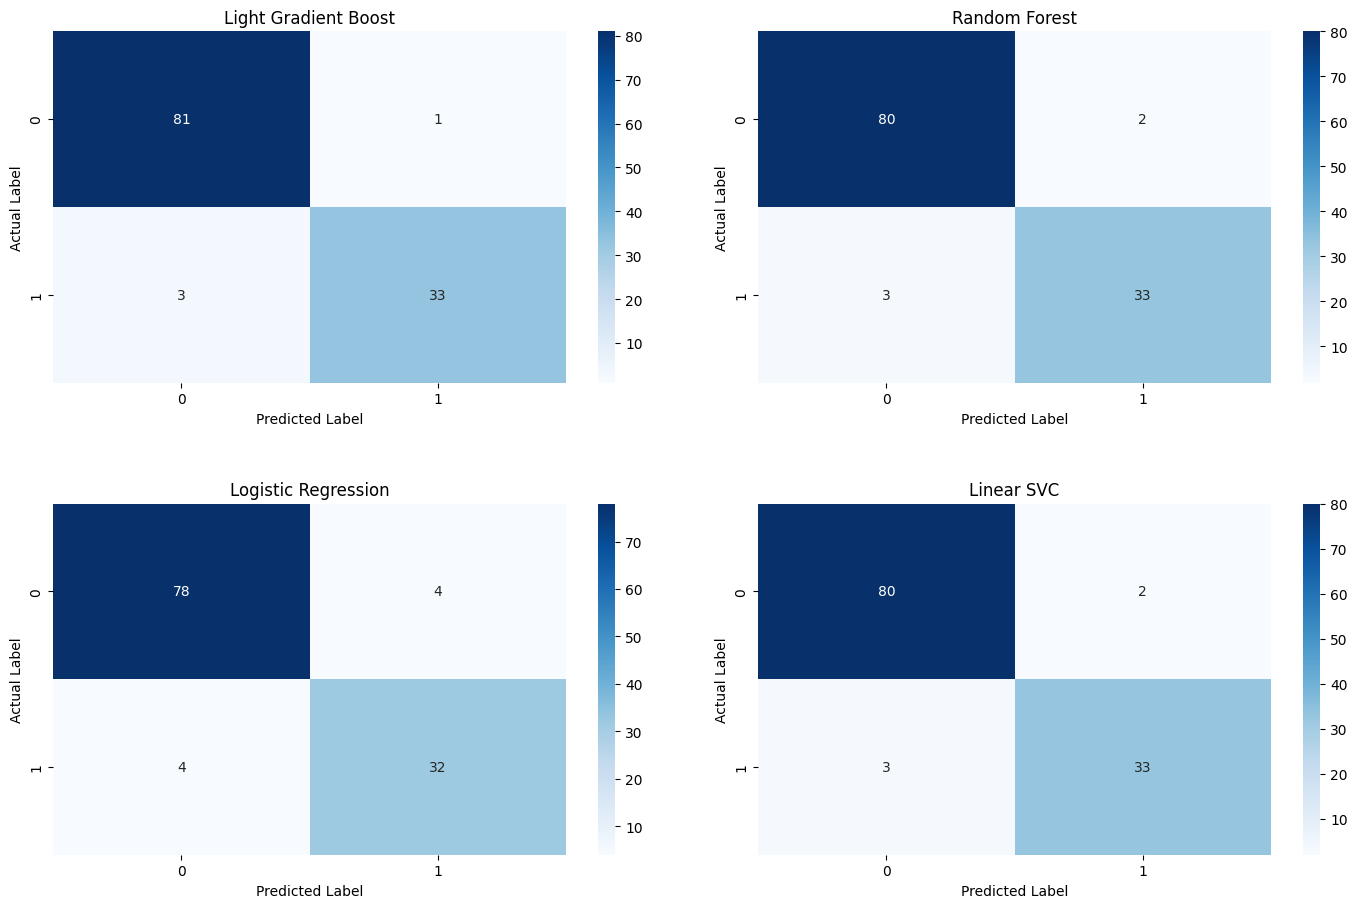

In [ ]:
def plot_confusion_matrix(axes):
    for i, item in enumerate(model_list):
        if i < len(axes):  # Ensure we do not exceed the number of axes
            cm = item['confusion_matrix']
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
            axes[i].set_title(f"{item['name']}")
            axes[i].set_ylabel("Actual Label")
            axes[i].set_xlabel("Predicted Label")

# Call to display the confusion matrices
display_grid(plot_confusion_matrix,15, 5)

## Compare Models - Interpretation - Feature Importance by Sharp Bar Plot



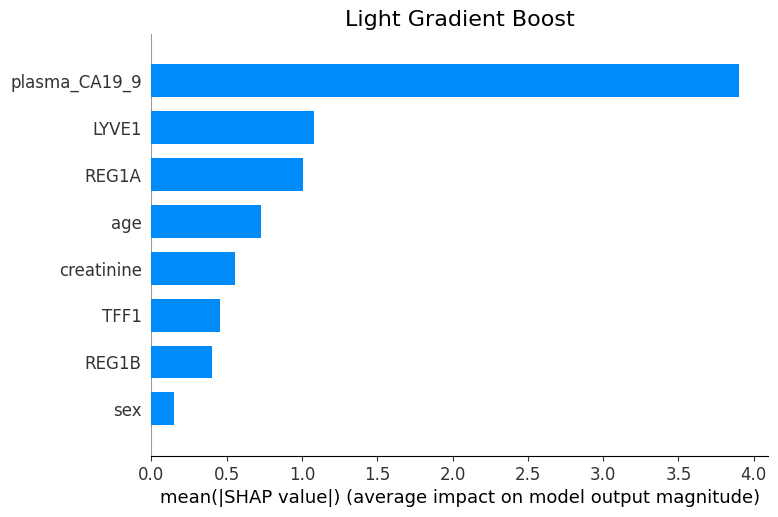

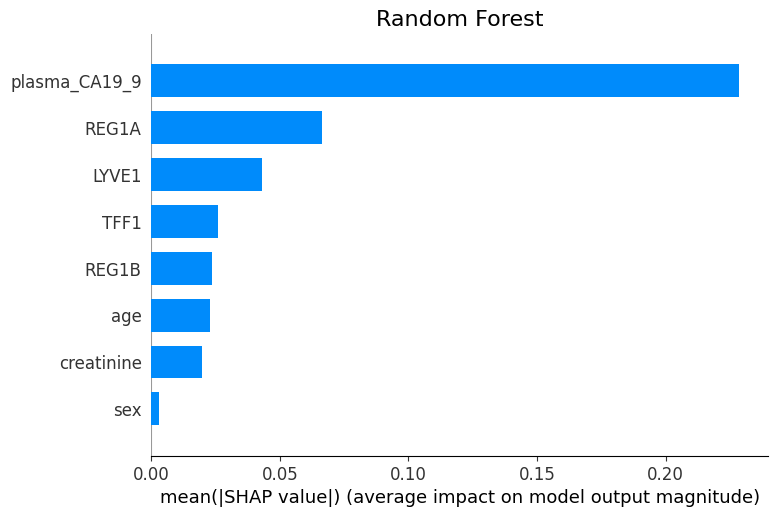

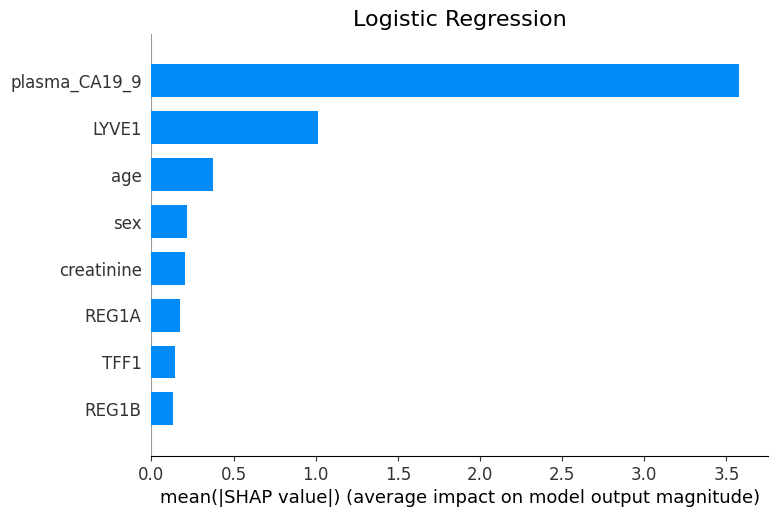

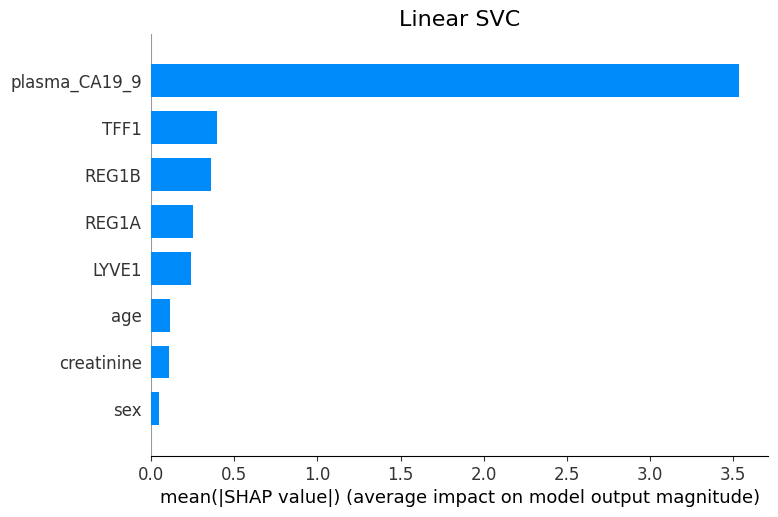

In [ ]:
def plot_shap_summary_bar():
    for i, item in enumerate(model_list):
        model_name = item['name']
        model = item['model']
        # Calculate SHAP values using the appropriate Explainer
        explainer = shap.Explainer(model, X_test)

        try:
            if model_name == "Random Forest":
                shap_values_rf = explainer(X_test, check_additivity=False)
                shap_values_class_1 = shap_values_rf[:, :, 1]
                shap.summary_plot(shap_values_class_1, X_test, plot_type="bar", show=False, plot_size=(8,5))
            else:
                shap_values = explainer(X_test)
                shap.summary_plot(shap_values, X_test, plot_type="bar", show=False, plot_size=(8, 5))

            plt.title(f"{model_name}", fontsize=16)  # Set custom title and font size
            plt.xticks(fontsize=12)  # Adjust font size for x-axis labels
            plt.yticks(fontsize=12)  # Adjust font size for y-axis labels
            plt.show()  # Show the plot

        except Exception as e:
            print(f"Error plotting SHAP values for {model_name}: {e}")

# Call the function to plot SHAP summary bar plots
plot_shap_summary_bar()


## Best Model Conclusion - Light Gradient Boost

In [ ]:
# Difine the best model
def get_confusion_matrix(axes):
  for item in model_list:
      if item['name'] == 'Light Gradient Boost':  # Ensure we do not exceed the number of axes
          return item

best_model_item = get_confusion_matrix(model_list)
print("best_model_item is ", best_model_item)

best_model = best_model_item['model']
print("\nbest model is: ", best_model)


best_model_item is  {'model': LGBMClassifier(random_state=42), 'name': 'Light Gradient Boost', 'predict_value': array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0]), 'confusion_matrix': array([[81,  1],
       [ 3, 33]])}

best model is:  LGBMClassifier(random_state=42)


# LightGBM Deep Research
### Feature Combination Impact
* Performance Exploration (Confusion Matrix)	17
* Feature Importance Exploration (SHAP Value Bar)	18
* Feature Impact Exploring by Beeswarm Plot	19
* Core Feature (Plasma CA 19-9) Exploration (SHAP Scatter)	20
* REG1A & REG1B Correlation Exploration (PDP)
* Lime Local

### Independent Feature Impact
(remark: Just detection, result should not be adapted in research result)

## Feature Combination Impact Research

In [ ]:
# SHAP Values Calculation
explainer = shap.Explainer(best_model, X_test)
shap_values = explainer(X_test)

### Feature Combination Impact - SHAP Feature Importance

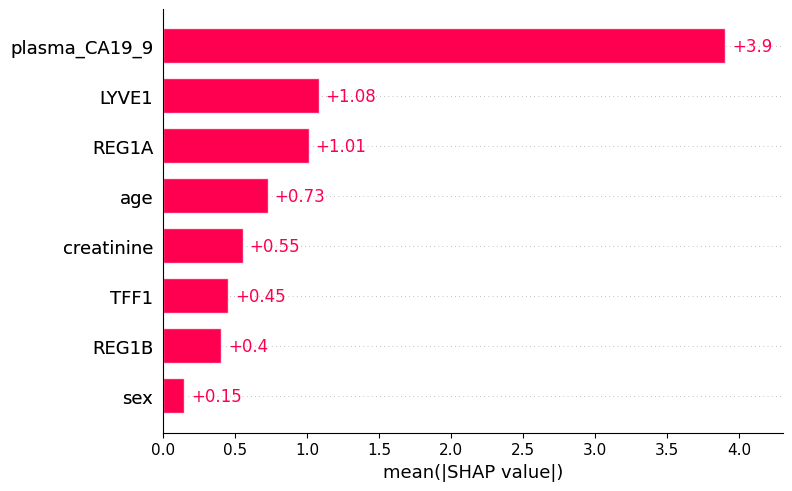

In [ ]:
shap.plots.bar(shap_values)

### Feature Combination Impact - SHAP Beeswarm Plot

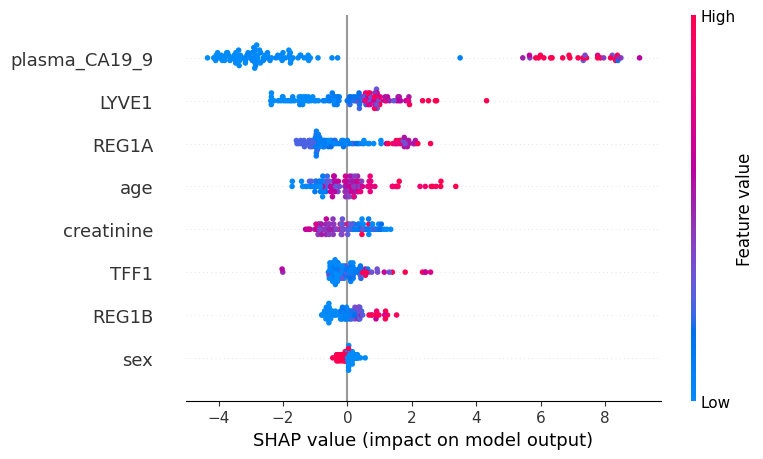

In [ ]:
# Summary plot for SHAP values
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

### Feature Combination Impact - SHAP Scatter Summary Plot

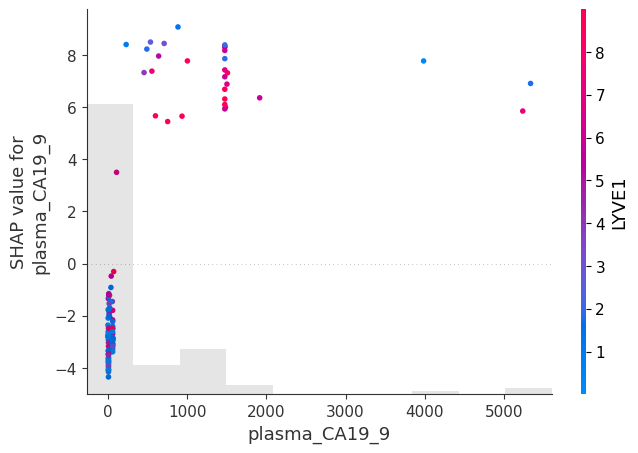

In [ ]:
# Create a SHAP scatter plot for plasma_CA19_9
shap.plots.scatter(shap_values[:, "plasma_CA19_9"], color=shap_values)


plt.show()

### Feature Combination Impact - PDP

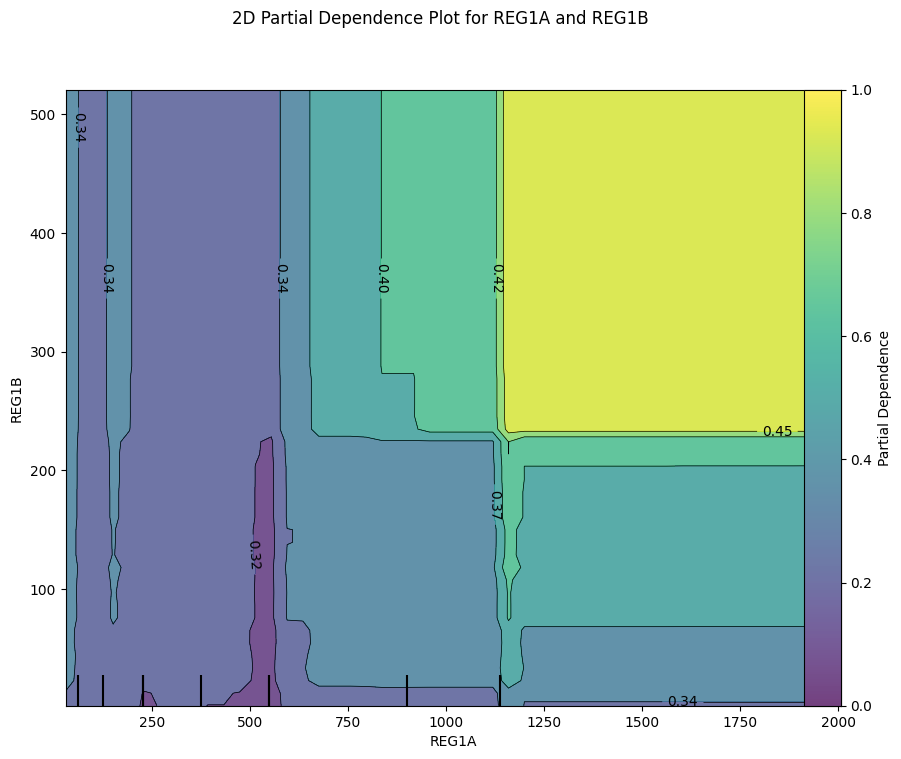

In [ ]:
# Define the features to analyze
features = [('REG1A', 'REG1B')]

# Create the 2D PDP for the interaction between REG1A and REG1B
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the partial dependence display
disp = PartialDependenceDisplay.from_estimator(best_model, X_train, features, ax=ax, grid_resolution=50)

# Create a divider for the existing axes instance
divider = make_axes_locatable(ax)

# Append a new axes to the right of the main plot for the colorbar
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar to the plot
for contour_set in disp.contours_[0]:
    im = contour_set.collections[0]
    fig.colorbar(im, cax=cax, label='Partial Dependence')

# Customize the plot
plt.suptitle('2D Partial Dependence Plot for REG1A and REG1B')
ax.set_xlabel('REG1A')
ax.set_ylabel('REG1B')

plt.show()

## Feature Combination Impact - False Negative - SHAP decision Summary

Real indices of False Negatives: Index([420, 555, 397], dtype='int64')


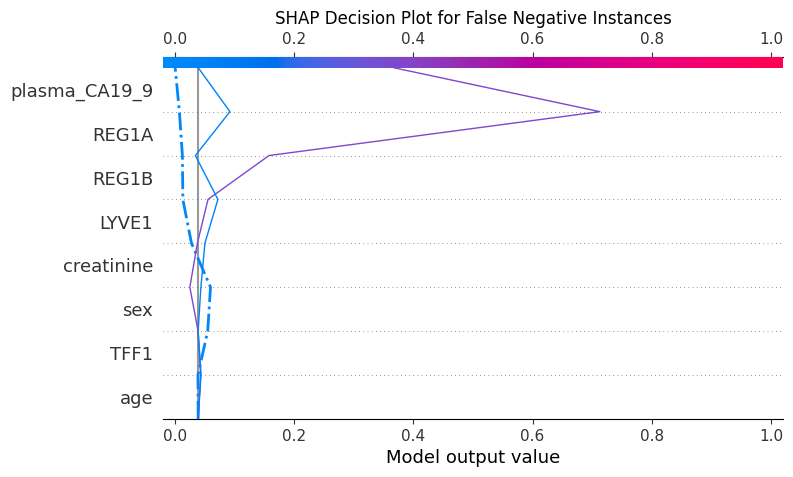

In [ ]:
y_pred_best_model = best_model.predict(X_test)
def shap_decision_summary():

  # Step 1: Identify false negative instances
  false_negative = (y_pred_best_model == 0) & (y_test == 1)  # Assuming 1 represents positive (Cancer) and 0 represents negative (No Cancer)
  false_negative_indices = np.where(false_negative)[0]

  real_indices = X_test.index[false_negative_indices]
  print("Real indices of False Negatives:", real_indices)


  # If there are no false negatives, handle the case
  if len(false_negative_indices) == 0:
      print("No false negative instances found.")
  else:
      # Step 2: Calculate SHAP values for these instances
      shap_values_de = explainer(X_test.iloc[false_negative_indices])

      # Step 3: Extract the features of false negative instances
      false_negative_features = X_test.iloc[false_negative_indices]

      # Step 4: Create a SHAP decision plot for the false negative instances
      shap.decision_plot(
          base_value=explainer.expected_value,
          shap_values=shap_values_de.values,
          features=false_negative_features,
          feature_names=X_test.columns.tolist(),
          highlight=0,  # Optionally, highlight the first instance in the plot
          link="logit",
          title="SHAP Decision Plot for False Negative Instances",
      )
      plt.show()


shap_decision_summary()

### Feature Combination Impact - Lime Local - True Negative

In [ ]:
print(X_test.iloc[0])

age              45.00
sex               0.00
plasma_CA19_9     8.00
creatinine        0.86
LYVE1             0.96
REG1B            29.52
TFF1            363.08
REG1A           227.00
Name: 39, dtype: float64


In [ ]:
# LIME has one explainer for all the models
explainer1 = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['No Cancer', 'Cancer'], verbose=True, mode='classification')
# Choose the 0 indext instance and use it to predict the results
exp = explainer1.explain_instance(X_test.iloc[0], best_model.predict_proba, num_features=8)
exp.show_in_notebook(predict_proba=True)

print("\n\n\n")

Intercept 0.596094839745754
Prediction_local [-0.03513697]
Right: 3.26282138053257e-05


In [ ]:
exp.as_list()

[('plasma_CA19_9 <= 8.00', -0.35627604943641195),
 ('age <= 50.00', -0.1098441782547361),
 ('0.16 < LYVE1 <= 1.65', -0.08275283868387762),
 ('0.72 < creatinine <= 1.18', -0.06073006505151679),
 ('sex <= 0.00', 0.034573887563151925),
 ('176.64 < REG1A <= 375.26', -0.02183167369256967),
 ('255.83 < TFF1 <= 747.52', -0.021812109240548473),
 ('10.14 < REG1B <= 34.02', -0.012558785995472159)]

## Independent Feature Impact Research

In [ ]:
df2.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,0,0,11.70,1.83,0.89,52.95,654.28,1262.00
1,81,0,0,8.00,0.97,2.04,94.47,209.49,228.41
2,51,1,0,7.00,0.78,0.15,102.37,461.14,227.00
3,61,1,0,8.00,0.70,0.00,60.58,142.95,227.00
4,62,1,0,9.00,0.21,0.00,65.54,41.09,227.00


### Key Feature - Plasma - Independent Impact on Prediction Result

[LightGBM] [Info] Number of positive: 163, number of negative: 309
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 472, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345339 -> initscore=-0.639591
[LightGBM] [Info] Start training from score -0.639591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

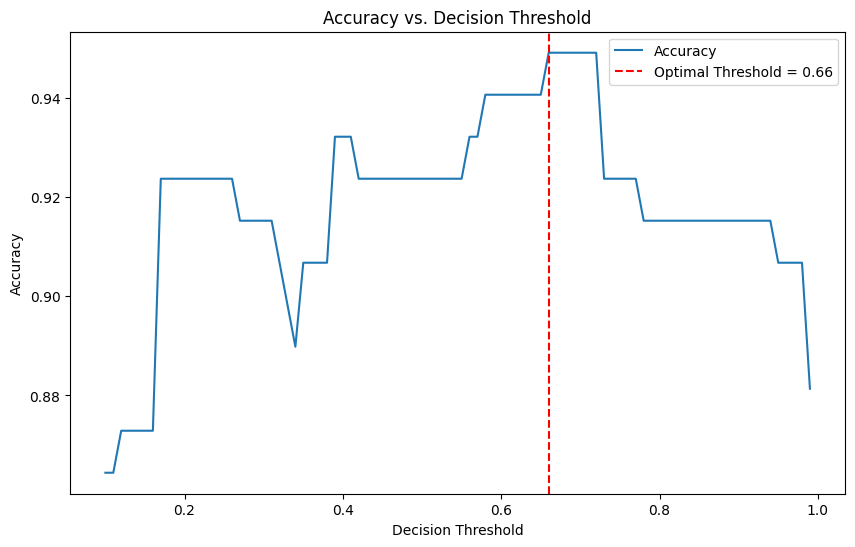


 Final Accuracy: 0.9491525423728814

 Final ROC AUC Score: 0.9652777777777779

 Confusion Matrix:
 [[82  0]
 [ 6 30]]


In [ ]:
df_feature = df2.copy()

# Keep only the 'plasma_CA19_9' column as your feature, and 'diagnosis' as your target variable
X1 = df_feature[["plasma_CA19_9"]]
y1 = df_feature["diagnosis"]

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=63)

# Initialize the LGBMClassifier
lgbm_model = LGBMClassifier(random_state=42)

# Train the model
lgbm_model.fit(X1_train, y1_train)

# Make predictions (probabilities)
y1_pred_proba = lgbm_model.predict_proba(X1_test)[:, 1]

# Adjust decision threshold
thresholds = np.arange(0.1, 1.0, 0.01)
accuracies = []

for threshold in thresholds:
    y1_pred_adjusted = (y1_pred_proba >= threshold).astype(int)
    accuracy = accuracy_score(y1_test, y1_pred_adjusted)
    accuracies.append(accuracy)

# Find the optimal threshold
optimal_threshold = thresholds[np.argmax(accuracies)]
print("Optimal Threshold:", optimal_threshold)

# Plot accuracy vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, label='Accuracy')
plt.axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Decision Threshold')
plt.legend()
plt.show()

# Evaluate the model with the optimal threshold
y1_pred_final = (y1_pred_proba >= optimal_threshold).astype(int)
accuracy_final = accuracy_score(y1_test, y1_pred_final)
roc_auc_final = roc_auc_score(y1_test, y1_pred_proba)
cm_final = confusion_matrix(y1_test, y1_pred_final)

print("\n Final Accuracy:", accuracy_final)
print("\n Final ROC AUC Score:", roc_auc_final)
print("\n Confusion Matrix:\n", cm_final)



Optimal Threshold: 0.6599999999999997
Threshold where predicted output is always 1: when Plasma value >=  125


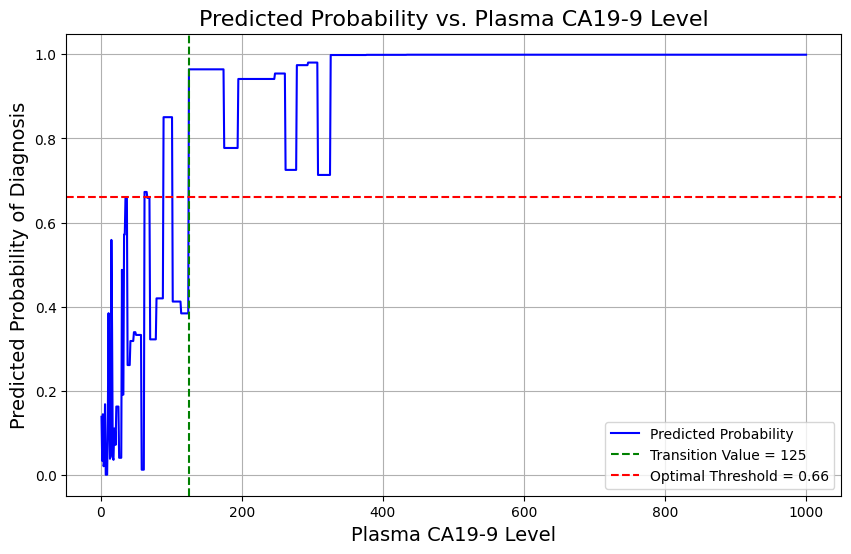

In [ ]:
# Simulate data for plasma_CA19_9 ranging from 1 to 1000
simulated_data = pd.DataFrame({"plasma_CA19_9": np.arange(1, 1001)})

# Predict probabilities for the simulated data
simulated_pred_proba = lgbm_model.predict_proba(simulated_data)[:, 1]

print("Optimal Threshold:", optimal_threshold)

# Find the threshold where predicted output is always 1
transition_index = np.where(simulated_pred_proba >= optimal_threshold)[0]  # Use probabilities instead of final predictions
if len(transition_index) > 0:
    # Iterate through the transition indices to find the stable threshold
    for idx in transition_index:
        if np.all(simulated_pred_proba[idx:] >= optimal_threshold):  # Check for probabilities
            transition_value = simulated_data.iloc[idx]['plasma_CA19_9']
            print("Threshold where predicted output is always 1: when Plasma value >= ", transition_value)
            break
    else:
        print("Predicted output is not always 1 from any value onward.")
else:
    print("No predictions resulted in 1.")

# Optionally, plot the results to visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(simulated_data['plasma_CA19_9'], simulated_pred_proba, label='Predicted Probability', color='blue')

if 'transition_value' in locals():
    plt.axvline(transition_value, color='g', linestyle='--', label=f'Transition Value = {transition_value}')

# Add the optimal_threshold line (horizontal line)
plt.axhline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')

plt.xlabel('Plasma CA19-9 Level', fontsize=14)
plt.ylabel('Predicted Probability of Diagnosis', fontsize=14)
plt.title('Predicted Probability vs. Plasma CA19-9 Level', fontsize=16)
plt.legend()
plt.grid()
plt.show()
